# Hometask 7
### Kirill Zakharov
#### Признак указанный в варианте ~ rose

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from pyts.decomposition import SingularSpectrumAnalysis
%matplotlib inline

plt.style.use('ggplot')
pd.set_option("display.max_columns", 32)

In [15]:
data = pd.read_excel('wine.xls')

In [16]:
data.head()

,fort,dry,sweet,red,rose,spark,total,year_,month_,date_
0,2585,1954,85,464,112,1686,15136,1980,1,JAN 1980
1,3368,2302,89,675,118,1591,16733,1980,2,FEB 1980
2,3210,3054,109,703,129,2304,20016,1980,3,MAR 1980
3,3111,2414,95,887,99,1712,17708,1980,4,APR 1980
4,3756,2226,91,1139,116,1471,18019,1980,5,MAY 1980


In [17]:
data = data['rose'].values

In [19]:
def matrix_X(L, N):
    matrix = np.ones((L, N-L+1))
    for i in range(L):
        for j in range(N-L+1):
            matrix[i, j] = data[i+j-2]
    return matrix        

In [21]:
x_matrix = matrix_X(4, len(data))

In [25]:
val, vec = np.linalg.eig(np.dot(x_matrix, x_matrix.T))

In [30]:
val = np.array(sorted(val))
val

array([  88748.86590218,  135003.79869836,  156719.58666241,
       6645200.74873705])

In [40]:
d = np.where(val > 0)[0][-1] + 1

In [43]:
sqrt_val = np.sqrt(val)

In [86]:
sqrt_val

array([ 297.90747876,  367.42863075,  395.87824727, 2577.82868879])

In [101]:
def calc_V(val, X, U, d):
    v = []
    for i in range(d):
        v.append(np.dot(X.T, U[i].reshape(-1, 1))/np.sqrt(val[i]))
    return v

In [102]:
v_matricies = calc_V(val, x_matrix, vec, d)

In [ ]:
(sqrt_val, vec, v_matricies); #собственные тройки

## Встроенный метод

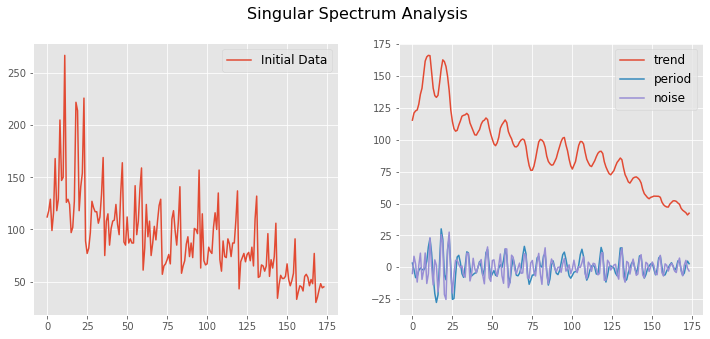

In [166]:
window_size = 5 #Ширина окна

ssa = SingularSpectrumAnalysis(window_size=window_size)
X_ssa = ssa.fit_transform(data.reshape(1, -1))

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121)
ax1.plot(data, label='Initial Data')
ax1.legend(loc='best', fontsize=12)

ax2 = plt.subplot(122)

ax2.plot(X_ssa[0], label='trend')
ax2.plot(X_ssa[1], label='period')
ax2.plot(X_ssa[2], label='noise')

ax2.legend(loc='best', fontsize=12)
plt.suptitle('Singular Spectrum Analysis', fontsize=16)
plt.show()

По разложению видно, что тренд убывающий, период колебаний около 25.